In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

<h1>Air reserve DB from csv</h1>

In [2]:
df = pd.read_csv("../input/air_reserve.csv", parse_dates=['visit_datetime', 'reserve_datetime'])

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92378 entries, 0 to 92377
Data columns (total 4 columns):
air_store_id        92378 non-null object
visit_datetime      92378 non-null datetime64[ns]
reserve_datetime    92378 non-null datetime64[ns]
reserve_visitors    92378 non-null int64
dtypes: datetime64[ns](2), int64(1), object(1)
memory usage: 2.8+ MB


In [4]:
df.describe()

,reserve_visitors
count,92378.000000
mean,4.481749
std,4.919669
min,1.000000
25%,2.000000
50%,3.000000
75%,5.000000
max,100.000000


In [5]:
df.head()

,air_store_id,visit_datetime,reserve_datetime,reserve_visitors
0,air_877f79706adbfb06,2016-01-01 19:00:00,2016-01-01 16:00:00,1
1,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,3
2,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,6
3,air_877f79706adbfb06,2016-01-01 20:00:00,2016-01-01 16:00:00,2
4,air_db80363d35f10926,2016-01-01 20:00:00,2016-01-01 01:00:00,5


In [6]:
#a , b = 10 , 20
# lamda is more efficient than above two methods 
# because in lambda  we are assure that 
# only one expression will be evaluated unlike in 
# tuple and Dictionary 

#print((lambda: b, lambda: a)[a < b]()) 

#print((lambda: "string false", lambda: "string true")[df.isnull().values.any() == True]())
#s = (df.isnull().values.any() == True ? "We have Null :(" : "We dont have Null :)")
#print("In this Data Set %s"%s )

df.isnull().values.any()

False

<h2>Column: reserve_visitors</h2>

In [12]:
print(df['reserve_visitors'].describe())
print('\n\n')
print("%s unique numbers of reserve visitors is"%len(df['reserve_visitors'].unique()))

count    92378.000000
mean         4.481749
std          4.919669
min          1.000000
25%          2.000000
50%          3.000000
75%          5.000000
max        100.000000
Name: reserve_visitors, dtype: float64



71 unique numbers of reserve visitors is


<p>Data is clean and it does not contain any missing values.</p>

In [13]:
# Time serias Min Max of reserve and visit
print("Min of visit datetime  is: %s"% df['visit_datetime'].min())
print("Max of visit datetime  is: %s"%df['visit_datetime'].max())
print("Min of reserve datetime is: %s"%df['reserve_datetime'].min())
print("Max of reserve datetime is: %s"%df['reserve_datetime'].max())

Min of visit datetime  is: 2016-01-01 19:00:00
Max of visit datetime  is: 2017-05-31 21:00:00
Min of reserve datetime is: 2016-01-01 01:00:00
Max of reserve datetime is: 2017-04-22 23:00:00


<h2>Column: air_store_id </h2>

In [14]:
print('The dataset contains info about %s restaurants' % len(df['air_store_id'].unique()))

The dataset contains info about 314 restaurants


In [15]:
# The restaurants sorted by number of reservations
df['air_store_id'].value_counts()

air_8093d0b565e9dbdf    2263
air_e55abd740f93ecc4    1903
air_0a74a5408a0b8642    1831
air_cf5ab75a0afb8af9    1758
air_6d65542aa43b598b    1436
air_de692863bb2dd758    1355
air_326ca454ef3558bc    1282
air_03963426c9312048    1267
air_483eba479dc9910d    1232
air_f911308e19d64236    1197
air_3bb99a1fe0583897    1185
air_24b9b2a020826ede    1143
air_5f6fa1b897fe80d5    1134
air_6b15edd1b4fbb96a    1085
air_877f79706adbfb06    1061
air_2cee51fa6fdf6c0d    1057
air_96743eee94114261     996
air_2d3afcb91762fe01     952
air_a083834e7ffe187e     938
air_1408dd53f31a8a65     918
air_d6b3e67261f07646     898
air_af63df35857b16e6     870
air_7831b00996701c0f     858
air_4092cfbd95a3ac1b     854
air_3c05c8f26c611eb9     839
air_9b6af3db40da4ae2     836
air_de803f7e324936b8     832
air_e7fbee4e3cfe65c5     828
air_3cad29d1a23209d2     823
air_4b55d8aea1d2b395     814
                        ... 
air_5bd22f9cc1426a90       2
air_1f1390a8be2272b3       2
air_876d7a23c47811cb       2
air_234d3dbf7f

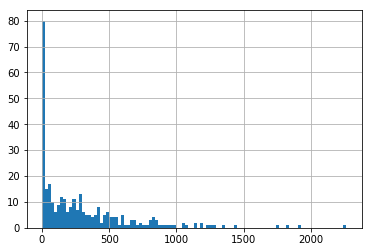

In [16]:
df['air_store_id'].value_counts().hist(bins=100)

<h2>Column: visit_datetime</h2>
<p>Having new Column <code>visit_datetime_weekday_name</code></p>
<p>Having new Column <code>visit_datetime_month</code></p>

In [17]:
df['visit_datetime'].describe()

count                   92378
unique                   4975
top       2016-12-24 19:00:00
freq                      255
first     2016-01-01 19:00:00
last      2017-05-31 21:00:00
Name: visit_datetime, dtype: object

## some fects about our time serias in the visit_datetime

#### for Months:
`In[]: df['visit_datetime'].dt.month.unique()
Out[]: array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])`

#### for Days:
`In[]: df['visit_datetime'].dt.weekday_name.unique()
Out[]: array(['Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday','Thursday'], dtype=object)`

#### for Hours:
`In[]: df['visit_datetime].dt.unique()
Out[]: array([16, 19,  1, 15, 14, 20, 17, 22, 12,  2, 18, 13, 21, 11, 23,  0, 10, 8,  9,  4,  7,  3,  6,  5])`


In [18]:
# Having Column of the day of the week
# we add new column 'visit_datetime_weekdayname'
df['visit_datetime_weekdayname'] = df['visit_datetime'].dt.weekday_name
print("All the days of the week in visit datetime:\n%s"%df['visit_datetime_weekdayname'].unique())
print(df['visit_datetime_weekdayname'].dtype)
print('\n')


# Having Column of the month
# we add new column 'visit_datetime_month'
df['visit_datetime_month'] = df['visit_datetime'].dt.month
print("All the months in visit datetime:\n%s"% df['visit_datetime_month'].unique())
print(df['visit_datetime_month'].dtype)
print('\n')

# Having Column of the hours
# we add new column 'visit_datetime_hour'
df['visit_datetime_hour'] = df['reserve_datetime'].dt.hour
print("All the hours in visit datetime:\n%s"% df['visit_datetime_hour'].unique())
print(df['visit_datetime_hour'].dtype)
print('\n')





All the days of the week in visit datetime:
['Friday' 'Saturday' 'Sunday' 'Monday' 'Tuesday' 'Wednesday' 'Thursday']
object


All the months in visit datetime:
[ 1  2  3  4  5  6  7  8  9 10 11 12]
int64


All the hours in visit datetime:
[16 19  1 15 14 20 17 22 12  2 18 13 21 11 23  0 10  8  9  4  7  3  6  5]
int64




<h2>Column: reserve_datetime</h2>
<p>Having new Column reserve_datetime_weekday_name</p>
<p>Having new Column reserve_datetime_month</p>

In [19]:
#df['reserve_datetime_weekdayname'] = df['reserve_datetime'].dt.weekday_name
df['reserve_datetime'].describe()

count                   92378
unique                   7513
top       2016-11-24 18:00:00
freq                      106
first     2016-01-01 01:00:00
last      2017-04-22 23:00:00
Name: reserve_datetime, dtype: object

## some fects about our time serias in the reserve_datetime

#### for Months:
`In[]: df['reserve_datetime'].dt.month.unique()
Out[]: array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])`

#### for Days:
`In[]: df['reserve_datetime'].dt.weekday_name.unique()
Out[]: array(['Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday','Thursday'], dtype=object)`

#### for Hours:
`In[]: df['reserve_datetime'].dt.hour.unique()
Out[]: array([16, 19,  1, 15, 14, 20, 17, 22, 12,  2, 18, 13, 21, 11, 23,  0, 10, 8,  9,  4,  7,  3,  6,  5])`

In [20]:
# Having Column of the day of the week of the reserve
# we add new column 'reserve_datetime_weekdayname'
df['reserve_datetime_weekdayname'] = df['reserve_datetime'].dt.weekday_name
print("All the days of the week in reserve datetime:\n%s"%df['reserve_datetime_weekdayname'].unique())
print(df['reserve_datetime_weekdayname'].dtype)
print('\n')


# Having Column of the month
# we add new column 'reserve_datetime_month'
df['reserve_datetime_month'] = df['reserve_datetime'].dt.month
print("All the months in reserve datetime:\n%s"% df['reserve_datetime_month'].unique())
print(df['reserve_datetime_month'].dtype)
print('\n')

# Having Column of the hours
# we add new column 'reserve_datetime_hour'
df['reserve_datetime_hour'] = df['reserve_datetime'].dt.hour
print("All the hours in reserve datetime:\n%s"% df['reserve_datetime_hour'].unique())
print(df['reserve_datetime_hour'].dtype)
print('\n')


All the days of the week in reserve datetime:
['Friday' 'Saturday' 'Sunday' 'Monday' 'Tuesday' 'Wednesday' 'Thursday']
object


All the months in reserve datetime:
[ 1  2  3  4  5  6  7  8  9 10 11 12]
int64


All the hours in reserve datetime:
[16 19  1 15 14 20 17 22 12  2 18 13 21 11 23  0 10  8  9  4  7  3  6  5]
int64




In [21]:
# Time serias Min Max of reserve and visit
print("Min of visit datetime  is: %s"% df['visit_datetime'].min())
print("Max of visit datetime  is: %s"%df['visit_datetime'].max())
print("Min of reserve datetime is: %s"%df['reserve_datetime'].min())
print("Max of reserve datetime is: %s"%df['reserve_datetime'].max())

Min of visit datetime  is: 2016-01-01 19:00:00
Max of visit datetime  is: 2017-05-31 21:00:00
Min of reserve datetime is: 2016-01-01 01:00:00
Max of reserve datetime is: 2017-04-22 23:00:00


In [22]:
df.head()

,air_store_id,visit_datetime,reserve_datetime,reserve_visitors,visit_datetime_weekdayname,visit_datetime_month,visit_datetime_hour,reserve_datetime_weekdayname,reserve_datetime_month,reserve_datetime_hour
0,air_877f79706adbfb06,2016-01-01 19:00:00,2016-01-01 16:00:00,1,Friday,1,16,Friday,1,16
1,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,3,Friday,1,19,Friday,1,19
2,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,6,Friday,1,19,Friday,1,19
3,air_877f79706adbfb06,2016-01-01 20:00:00,2016-01-01 16:00:00,2,Friday,1,16,Friday,1,16
4,air_db80363d35f10926,2016-01-01 20:00:00,2016-01-01 01:00:00,5,Friday,1,1,Friday,1,1


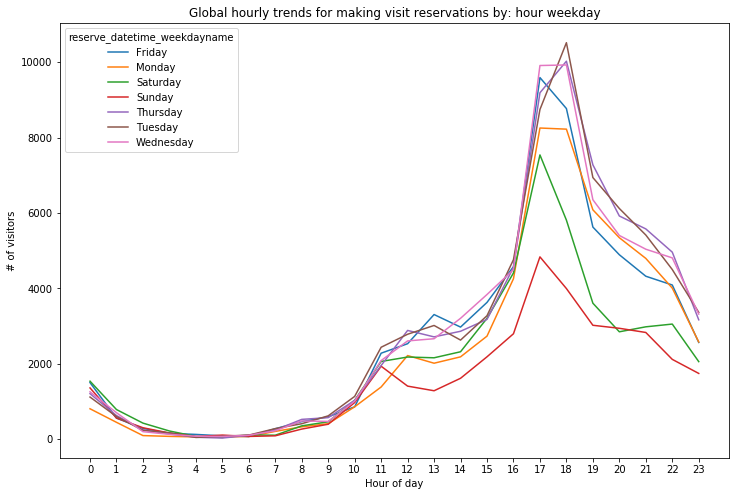

In [23]:
ax = df.pivot_table(index=df['reserve_datetime'].dt.hour, 
                    columns='reserve_datetime_weekdayname', 
                    values='reserve_visitors', 
                    aggfunc='sum').plot(figsize=(12,8), 
                                        title='Global hourly trends for making visit reservations by: hour weekday',
                                        xticks=np.arange(0,24,1)) #the numbers are between 0 to 23 with a 1 jump
 
ax.set_xlabel("Hour of day")
ax.set_ylabel("# of visitors");

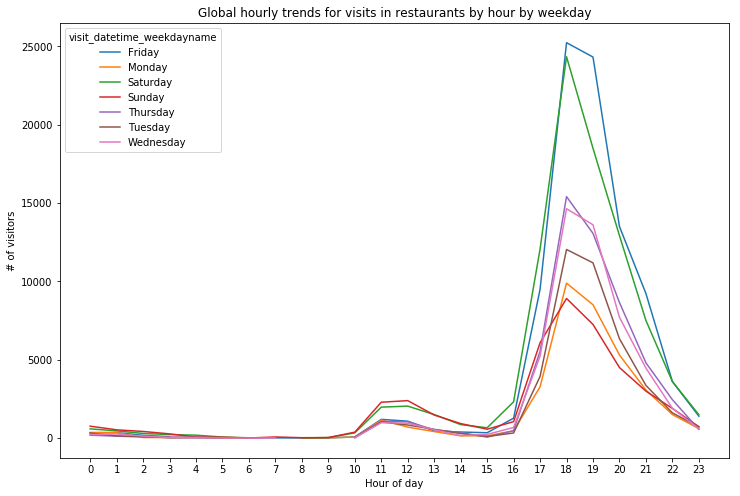

In [24]:
ax = df.pivot_table(index=df['visit_datetime'].dt.hour, 
                    columns='visit_datetime_weekdayname', 
                    values='reserve_visitors', 
                    aggfunc='sum').plot(figsize=(12,8), 
                                        title='Global hourly trends for visits in restaurants by hour by weekday',
                                        xticks=np.arange(0, 24, 1))

ax.set_xlabel("Hour of day")
ax.set_ylabel("# of visitors");


In [25]:
df_visits = df[['visit_datetime', 'reserve_visitors']]

# Set index and delete the column
df_visits.index = df_visits['visit_datetime']
del df_visits['visit_datetime']

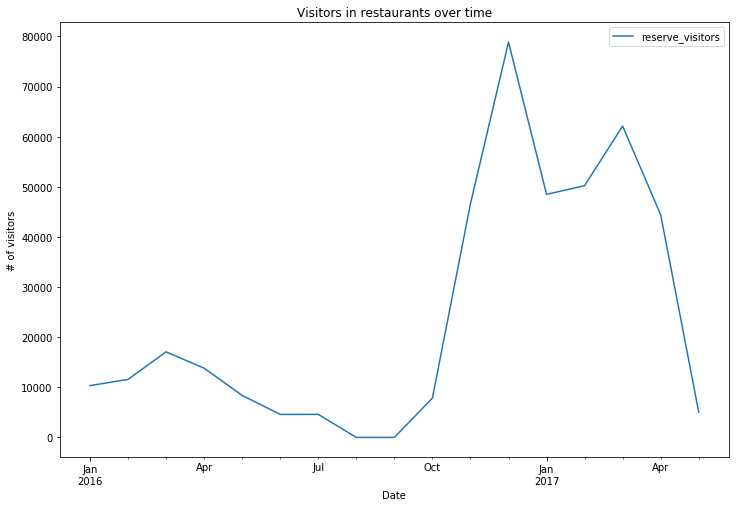

In [26]:
ax = df_visits.resample('M').sum().plot(figsize=(12,8), 
                                        title='Visitors in restaurants over time');
ax.set_xlabel("Date")
ax.set_ylabel("# of visitors");


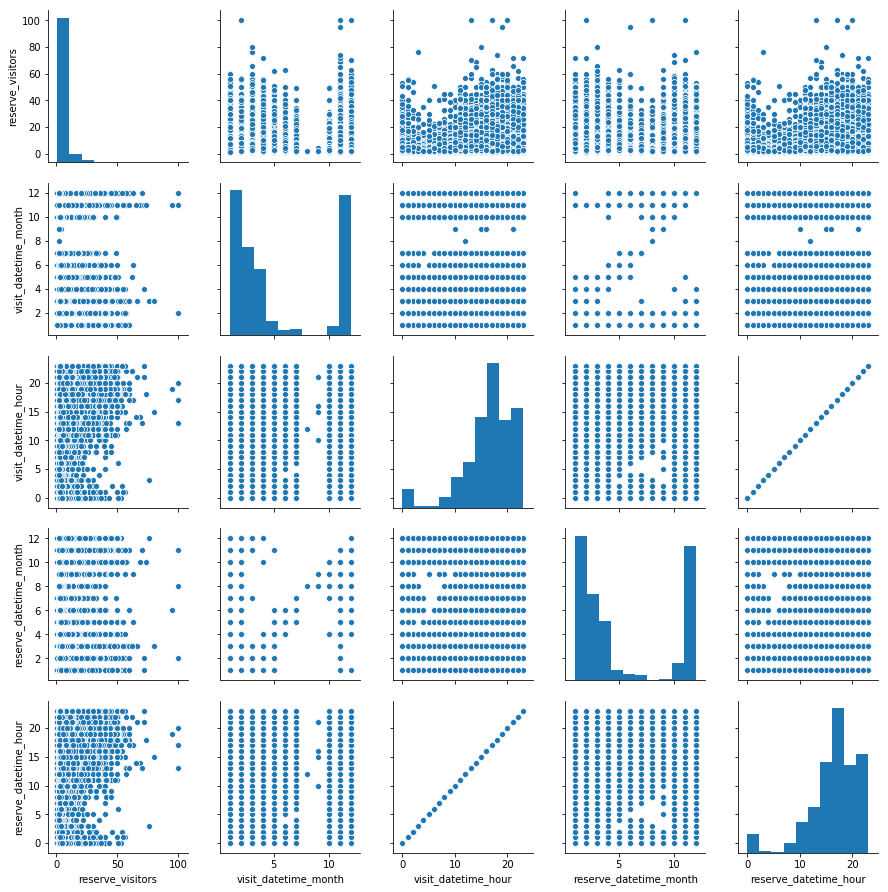

In [27]:
sns.pairplot(df)